# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Recall that in linear regression models, the dependent (target) variable is continuous quantitative in nature. In situations where the nature of dependent (target) variable is categorical, the logistic regression can be used to model the relationship. Recall that the logistic regression model is given as:

$$ f(x) = \frac{1}{1+e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + . . . + \beta_nx_n)}} $$

The nature of logistic regression can be binomial, ordinal or multinomial. In order to predict dependent (target) variable which can take only two values (yes/no , 0/1) __Binomial (or binary) logistic regression__ model is used. 

__Multinomial logistic regression__ is used when the dependent variable can take three of more categorical values which are not ordered. 

Whereas the __ordinal logistic regression__ is used when the dependent variable can take categorical values that are ordered.

The figure below illustrates the prediction range of [0,1] for the logistic regression model as compared to the prediction range of [$-\infty, \infty$] for the linear regression model.

![](images/1.PNG)

This suggests that the use of the logistic regression model with a logit link function (as mentioned in generalized linear models) would confine the prediction values within the [0, 1] bounds.

***
Having understood the basic concept behind logistic regression, we shall now use logistic regression to classify the data instances into binary class labels based on the probability of success for an event of interest.

Consider the 'default' dataset which contains details of credit card payments by the customers. Details about the income of the customer, the average balance amount to be repaid, occupational status (Student/Non-student) and the repayment status (Defaulter/Non-Defaulter) are provided.

The default dataset contains 10000 observations for 4 variables, as shown below.

In [2]:
default = pd.read_csv("default.csv")
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [3]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


We can observe that the variables “balance” and “income” are continuous numeric variables, whereas the variables "default" and "student" are a factor with two levels.

Using logistic regression as a classifier we shall try to classify the customer as a defaulter or a non-defaulter based on the balance amount to be repaid.

Scatter plot of default data set

Text(0, 0.5, 'default')

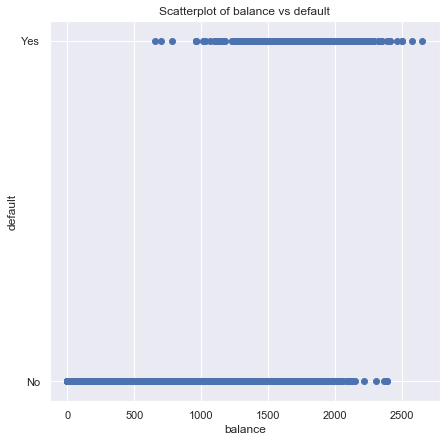

In [5]:
plt.figure(figsize = (7,7))
plt.scatter("balance", 'default', data = default)
plt.title('Scatterplot of balance vs default')
plt.xlabel('balance')
plt.ylabel('default')

In order to classify the customer as a defaulter or a non-defaulter, let us build a logistic regression model having default as dependent variable and balance as a predictor variable.

##### Training and testing data

We shall divide the data into train and test splits in the ratio of 75:25 as shown below

Since we are fitting a logistic regression model using 'balance' as a predictor variable. Therefore, the features variable contains only 'balance' column data.

__Reference documentation:__ [Sklearn Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [6]:
np.random.seed(113)
features = default[["balance"]]
target = default["default"]

In [7]:
from sklearn.model_selection import train_test_split
# Splitting into training and testing data
features_train, features_test, target_train,target_test = train_test_split(features,target, test_size = 0.25)

In [8]:
features_train.shape, features_test.shape

((7500, 1), (2500, 1))

Here, 75% of the data is used as training data and the remaining 25% of the data is used as testing data.

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print("Intercept:", model.intercept_,"\nCoefficients", model.coef_)

Intercept: [-10.50340662] 
Coefficients [[0.00541381]]


The obtained regression model can be represented as:

$$ ln(\frac{p}{1-p}) = -10.50340662 + 0.00541381*balance$$

The above equation is the formula for logistic regression.

We can infer from the obtained logistic regression model that for a unit change in balance, the log(odds ratio) changes by 0.541 %.

In other words, the probability of the customer being classified as a defaulter, based on a unit change in balance is given as:

Sigmoid function

$$ p = \frac{1}{1+e^{-y}} $$

i.e,

$$ p = \frac{1}{1+e^{-10.5034 - 0.00541*balance}}$$

So our linear equation will be converted to a sigmoid function in logistic regression.

![](images\2.PNG)


So here we calculate the probaility of occurence of an event based on the predictor variables:

![](images\3.png)

![](images\4.png)

Let us now evaluate the model's performance (accuracy) on the train and test data.

In [11]:
train_accuracy = model.score(features_train, target_train)
test_accuracy = model.score(features_test, target_test)
print(train_accuracy, test_accuracy)

0.9716 0.9756


In [13]:
target_pred = model.predict(features_test)
target_pred[target_pred=="No"].shape

(2469,)

#### Confusion Matrix

We can use the confusion matrix to further understand the predictions made by the model.

In [14]:
from sklearn.metrics import confusion_matrix
test_conf_matrix = confusion_matrix(target_test,target_pred)
pd.DataFrame(test_conf_matrix ,columns = model.classes_,index = model.classes_)

,No,Yes
No,2415,7
Yes,54,24


In the above matrix, we can observe that the model predicted:
- 2421 non-defaulters as non-defaulters
- 16 defaulters as defaulters
- 1 non-defaulter as a defaulter
- 62 defaulters as non-defaulters

The above information from the confusion matrix can be used to compute the prediction accuracy as follows:

$$ Accuracy = \frac{CorrectPredictionsCount}{TotalPredictionsCount} = \frac{2415+24}{2500} = 0.9756$$

In [17]:
test_correct_predictions = test_conf_matrix[0][0] + test_conf_matrix[1][1]
test_total_predictions  = test_conf_matrix.sum()
test_accuracy = test_correct_predictions / test_total_predictions
print(test_accuracy)

0.9756


Hence, the obtained logistic regression model has a classification accuracy of - 97.56%.